<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
#загружаем необходимые для работы библиотеки

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from matplotlib import pyplot as plt 

In [2]:
#устанавливаем опцию вывода всех колонок 
pd.set_option('display.max_columns', None)

#прочтем файл, сохранив его в переменной и установив знак разделителя
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#выведем на экран первые и последние 10 строк таблицы
display(data.head(10))
display(data.tail(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Рассмотрим общую информацию по таблице, а так же типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
#так же посмотрим числовые значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
#подсчитаем кол-во пропусков в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

В таблице в подавляющем большинстве колонок есть пропуски в строках: присутствуют как незначительные (например расстояние до ближайшего парка или водоема), так и те, которые играют достаточно важную роль при выборе квартиры (высота потолка или общая жилплощадь). Необходимо будет уделить этому особое внимание в следующем шаге. 

Так же присутствую данные, которые выбиваются из общей массы по значениям: к примеру высота потолка указана 100м в значении максимум; общая площать 900кв.м и т.д. Можно предположить, что действительно такие квартиры выставлены на продажу, но слишко неправдопобные размеры. 

Но в первую очередь необходимо проработать с пропусками.

In [6]:
#проверяем наличие дубликатов
data.duplicated().sum()

0

In [7]:
#проверяем долю пропущенных значений всех данных
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Проверка на лубликаты показала, что таковые отсутствуют в таблице. Доля пропущенных же значений больше всего в графах is_apartment (более 80% всех данных), parks_nearest и ponds_nearest (более 60% всех данных).

****

## Предобработка данных

***Рассмотрим каждый столбец, в котором были замечены пропуски или данные неудовлетворяющего вида***

**Проверяем данные колонки celling_height**

Так как было замечено, что максимальные и минимальные значения столбца неправдоподобны, то вычислим среднее ограничив выборку предельно-допустимыми значениями:

In [8]:
data.query('ceiling_height > 2 and ceiling_height < 8')['ceiling_height'].mean()

2.7273473480395545

In [9]:
#значения меньше 2 м и больше 8 м приравниваем к среднему
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2.73
data.loc[data['ceiling_height'] > 8, 'ceiling_height'] = 2.73

#проверим результат
data.query('ceiling_height < 2 and ceiling_height > 8')['ceiling_height'].sum()

0.0

Возможно, что некорректные значения - это результат неправильного ввода данных пользователем. Пропуски же могут нам говорить о том, что данные или не подгрузились, или пользователь не счет их важной информацией при выставлении квартиры на продажу.

In [10]:
#заполним отсутствующие значения средней величиной, чтобы сохранить статитстику по остальным данным
data['ceiling_height'] = data['ceiling_height'].fillna(2.73)

#проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [11]:
data.query('ceiling_height > 2 and ceiling_height < 8')['ceiling_height'].mode()

0    2.73
dtype: float64

In [12]:
#значения меньше 2 м и больше 8 м приравниваем к моде 
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2.5
data.loc[data['ceiling_height'] > 8, 'ceiling_height'] = 2.5

#заполним отсутствующие значения средней величиной, чтобы сохранить статитстику по остальным данным
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)

#проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

****

**Проверяем данные колонки floors_total**

In [13]:
data['floors_total'].isna().sum()

86

In [14]:
#выведем остальные значения, которые соответствуют пропускам в колонке floors_total
data.loc[data['floors_total'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.73,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.73,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.73,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.73,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.73,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.73,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.73,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.73,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.73,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.73,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Всего 86 пропусков из 23699 и неоднозначные показатели в столбце floor, которые могли бы указать на этажность дома. Пока можно оставить эти данные без изменений.

****

**Проверяем данные колонки living_area**

In [15]:
data['living_area'].agg(['min','max','mean','median'])

min         2.000000
max       409.700000
mean       34.457852
median     30.000000
Name: living_area, dtype: float64

In [16]:
#рассмотрим данные, где площадь меньше 10 кв.м

data.query('living_area < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.40,2019-02-07T00:00:00,1,2.90,8.0,8.3,7,NaN,False,False,6.3,NaN,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
680,14,7200000.0,43.00,2017-10-31T00:00:00,1,2.73,8.0,9.0,2,NaN,False,False,23.0,NaN,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0
1326,8,8100000.0,52.00,2017-01-29T00:00:00,2,2.70,25.0,9.0,15,NaN,False,False,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
2309,10,4200000.0,62.40,2017-06-15T00:00:00,2,2.60,9.0,8.4,6,NaN,False,False,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
3242,7,4440000.0,41.00,2017-07-02T00:00:00,1,2.73,17.0,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
4100,17,5300000.0,34.80,2017-06-19T00:00:00,1,2.70,23.0,9.0,15,NaN,False,False,17.1,0.0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30.0
4542,12,3300000.0,18.00,2018-11-07T00:00:00,1,3.50,5.0,9.0,2,NaN,False,False,NaN,NaN,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
7312,8,3400000.0,27.00,2018-02-21T00:00:00,2,2.50,15.0,9.0,4,NaN,False,False,16.0,NaN,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,NaN
8325,9,4800000.0,52.00,2017-10-25T00:00:00,2,2.73,5.0,9.0,2,NaN,False,False,6.0,1.0,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119.0
13915,20,6350000.0,52.00,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0


In [17]:
#заменим неправдоподобные значения на None 
data.loc[data['living_area'] < 10, 'living_area'] = None
data['living_area'].isna().sum()

1928

In [18]:
#проверяем результат применения к выбраным строкам
data.query('living_area < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Неправодоподобные значения устранены, но пропусков все так же много остается. Но удалять строки с данными может неблагоприятно повлиять на статистику. Оставляем с неизвестными площадями.

****

**Проверяем данные колонки is_apartment**

In [19]:
#найдем уникальные значения столбца
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [20]:
data.query('is_apartment != True or is_apartment != False')['is_apartment'].count()

2775

Скорее всего, пропущенные значения означают, что аппартаменты не входят в преложение по продаже квартиры.

In [21]:
#выполним замену неизвестных данных на False и поменям тип данных в bool
data['is_apartment'] = data['is_apartment'].fillna(False)

#теперь проверим уникальные значения
data['is_apartment'].unique()

array([False,  True])

****

**Проверяем данные колонки kirchen_area**

In [22]:
#выполним выборку по значению, где кухня меньше 5 кв.м.
data.query('kitchen_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,2800000.0,55.1,2016-05-14T00:00:00,3,2.60,5.0,38.4,1,False,False,False,4.9,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0
298,9,2650000.0,42.8,2017-04-25T00:00:00,2,2.73,5.0,30.0,3,False,False,False,4.5,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,49.0
422,8,1700000.0,55.2,2018-03-24T00:00:00,3,2.50,5.0,38.5,5,False,False,False,4.5,NaN,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,15,2600000.0,27.0,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,False,False,False,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
1327,6,2650000.0,46.2,2016-12-01T00:00:00,2,2.50,5.0,29.2,5,False,False,False,4.9,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22839,14,3350000.0,27.0,2018-11-03T00:00:00,1,2.70,16.0,NaN,6,False,False,False,4.0,2.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,35.0
22849,6,2380000.0,25.0,2016-03-22T00:00:00,1,2.73,25.0,19.0,15,False,False,False,4.0,1.0,посёлок Шушары,13461.0,19247.0,0.0,NaN,1.0,351.0,140.0
23110,1,2900000.0,34.0,2018-02-01T00:00:00,2,2.90,2.0,20.0,1,False,False,False,4.0,NaN,посёлок Стрельна,27006.0,23832.0,0.0,NaN,2.0,872.0,196.0
23498,7,1600000.0,54.0,2016-12-26T00:00:00,2,2.30,1.0,33.0,1,False,False,False,3.5,0.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.0


In [23]:
data['kitchen_area'].isna().sum()

2278

In [24]:
#заполним пропуски 0 значениями, так как это скорее всего связано с тем, что речь 
#про квартиры студии, комната объеденина с кухней и площадь учитывается уже общая
data['kitchen_area'] = data['kitchen_area'].fillna(0)

#вычислим среднее значения, но в диапазоне, где кухня больше 5 но меньше 15 кв/м
kitchen_area_mean = data.query('kitchen_area > 5' and 'kitchen_area < 15')['kitchen_area'].mean()

#заменим некорректные данные получившимся значением среднего
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = kitchen_area_mean

#проверяем результаты
data.query('kitchen_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


****

**Проверяем данные колонки balcony**

In [25]:
#отсутствующие значения
data['balcony'].isna().sum()

11519

In [26]:
#слишком много пропусков
#рассмотрим соотвестствия с остальными данными, где пропуск в значении balcony
data.loc[data['balcony'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.73,12.0,14.40,5,False,False,False,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.73,27.0,15.43,26,False,False,False,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,False,False,8.500000,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.73,5.0,17.50,4,False,False,False,6.000000,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,False,False,13.830000,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.73,5.0,38.00,4,False,False,False,8.500000,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.73,3.0,29.70,1,False,False,False,7.959033,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#заменим значение Nan на 0, так как можно предположить, что если пропуск, значит в квартире попросту нет балкона
data['balcony']=data['balcony'].fillna(0).astype('int')

#проверяем результат
data['balcony'].isna().sum()

0

****

**Проверяем данные колонки locality_name**

In [28]:
#исследуем на предмет уникальных значений
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [29]:
#приведем все значения к нижнему регистру, чтобы избавиться от дубликатов
data['locality_name'] = data['locality_name'].str.lower()

#исправим в слове "посёлок" - "е" на "ё"
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

#проверяем результат
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'посёлок молодцово',
       'посёлок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'посёлок торковичи', 'посёлок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет

****

**Проверяем данные колонки airports_nearest**

In [30]:
#чтобы оценить ошибку в выгрузке проверим значения равные 0
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Возможно, что единственное нулевое значение действительно вызвано ошибкой в выгрузке данных

In [31]:
#приравняем нулевое значение None, так как определить нельязя по смежным значениям
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None

#найдем самую ближайшую квартиру к аэропорту
data['airports_nearest'].min()

6450.0

Почти в 6,5км ближайшая квартира к аэропорту

****

**Проверяем данные колонки cityCenters_nearest**

In [32]:
#для начала приведем название столбца в читаемый вид
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

#для дальнейшего комфорта изучения столбцов, так же приведем в читаемый вид "parks_around3000" и "ponds_around3000" 
data.rename(columns = {'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000'}, inplace=True)

In [33]:
#чтобы оценить ошибку в выгрузке проверим значения равные 0
data.loc[data['city_centers_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.73,12.0,14.40,5,False,False,False,9.100000,0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.73,27.0,15.43,26,False,False,False,8.810000,0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.73,5.0,30.00,5,False,False,False,9.000000,0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.000000,2,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.73,9.0,NaN,2,False,False,False,7.959033,0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,False,False,5.500000,0,посёлок дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.73,5.0,17.50,4,False,False,False,6.000000,0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.73,5.0,38.00,4,False,False,False,8.500000,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.73,3.0,29.70,1,False,False,False,7.959033,0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Отсутствующие значения говорят нам о том, что квартира находится за чертой города, а значит указывать удаленность центра не имеет смысла, так как и так ясно, что далеко. Поэтому оставляем так как есть, потому что если удалить, то будут сильные искажения данных.

****

**Проверяем данные колонок parks_around_3000 и parks_nearest**

In [34]:
data['parks_around_3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [35]:
data['parks_around_3000'].isna().sum()

5518

In [36]:
#Заменим отсутствующие значения на 0, так как по всей видимости парков нет по близости 3км
#заменим тип данных на целочисленный
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21771 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18156 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around_3000   

In [37]:
#теперь рассмотрим колонку parks_nearest
data['parks_nearest'].agg(['min','max','mean','median'])

min          1.000000
max       3190.000000
mean       490.804555
median     455.000000
Name: parks_nearest, dtype: float64

In [38]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21771.000000,23699.000000,23699.000000,23699.000000,18156.000000,18180.000000,23699.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.728710,10.673824,34.489020,5.892358,10.336412,0.591080,28795.258096,14191.277833,0.469049,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.225728,6.597173,22.023718,4.885249,5.653154,0.959298,12629.420568,8608.386210,0.748534,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,10.000000,1.000000,5.000000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.500000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.730000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.730000,16.000000,42.300000,8.000000,11.440000,1.000000,37273.500000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [39]:
data['parks_nearest'].isna().sum()

15620

По сравнению с колонкой parks_around_3000 в колоке parks_nearest гораздо больше пропусков. Скорее всего это связано с проблемой выгрузки данных. Так как количество пропусков соответствует кол-ву парков находящихся на растоянии 3км, то логично будет произвести замену на среднюю величину удаленности до парка более 3км.

In [40]:
park_mean = data.query('parks_nearest > 3000')['parks_nearest'].mean()
data['parks_nearest']=data['parks_nearest'].fillna(park_mean)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21771 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18156 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around_3000  

****

**Проверяем данные колонок ponds_around_3000 и ponds_nearest**

In [41]:
data['ponds_around_3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [42]:
data['ponds_around_3000'].isna().sum()

5518

In [43]:
#Заменим отсутствующие значения на 0, так как по всей видимости водоемов нет по близости 3км
#заменим тип данных на целочисленный
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21771 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18156 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around_3000  

In [44]:
#теперь рассмотрим колонку parks_nearest
data['ponds_nearest'].agg(['min','max','mean','median'])

min         13.0000
max       1344.0000
mean       517.9809
median     502.0000
Name: ponds_nearest, dtype: float64

In [45]:
data['ponds_nearest'].isna().sum()

14589

In [46]:
#поступим так же как и с растояние до парка
#так как ситуация аналогичная
ponds_mean = data.query('ponds_nearest > 3000')['ponds_nearest'].mean()
data['ponds_nearest']=data['ponds_nearest'].fillna(ponds_mean)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21771 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18156 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around_3000  

****

**Проверяем данные колонки days_exposition**

In [47]:
#приведем формат времени и даты по столбцу "first_day_exposition" в более читаемый

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.00,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,False,False,False,11.000000,2,посёлок шушары,12817.0,18603.0,0,3114.25,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.73,5.0,34.3,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.00,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.73,14.0,NaN,9,False,False,False,7.959033,0,санкт-петербург,28098.0,6800.0,2,84.00,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.00,1,48.0,121.0


In [48]:
data['days_exposition'].agg(['min','max','median'])

min          1.0
max       1580.0
median      95.0
Name: days_exposition, dtype: float64

In [49]:
data['days_exposition'].isna().sum()

3181

In [50]:
data.query('days_exposition == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.00,2,755.0,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.73,24.0,NaN,22,False,False,False,18.900000,2,санкт-петербург,23982.0,11634.0,0,3114.25,0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18,1,2.73,22.0,NaN,3,False,False,False,7.959033,1,санкт-петербург,30471.0,11603.0,1,620.00,1,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02,2,2.65,9.0,30.3,7,False,False,False,7.000000,0,санкт-петербург,30011.0,12872.0,0,3114.25,0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31,2,2.60,24.0,29.7,9,False,False,False,8.300000,2,санкт-петербург,15114.0,12702.0,0,3114.25,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.4,17,False,False,False,15.600000,0,санкт-петербург,11827.0,11459.0,0,3114.25,0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5.0,17.3,5,False,False,False,5.600000,1,ломоносов,48393.0,51818.0,0,3114.25,0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.830000,0,санкт-петербург,24665.0,4232.0,1,796.00,3,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.73,3.0,29.7,1,False,False,False,7.959033,0,село рождествено,NaN,NaN,0,3114.25,0,NaN,NaN


Пропуски в столбце days_exposition  могут говорить о том, что объявление все еще в "актуальном"(то есть не снято с публикации), так как у него есть дата размещения.

***Вывод***

Большая часть данных отсутствует. Не похоже чтобы она была изначально неверно внесена, скорее всего это ошибка при выгрузке данных. Это может влиять на итоговый результат анализа. Необходимо сообщить о проблеме тем, кто занимается выгрузкой данных.

****

## Расчёты и добавление результатов в таблицу

*Расчитаем новые значения на основании имеющихся данных и добвим их в новые столбцы*

**Цена квадратного метра**

In [51]:
#новый столбец назовем sq_m_price
#среднее расчитаем как отношение цены на момент снятия с публикации к общей жилплощади
data['sq_m_price'] = data['last_price']/data['total_area']
data['sq_m_price'] = data['sq_m_price'].astype('int')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_m_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.00,2,755.0,NaN,120370
1,7,3350000.0,40.40,2018-12-04,1,2.73,11.0,18.60,1,False,False,False,11.000000,2,посёлок шушары,12817.0,18603.0,0,3114.25,0,NaN,81.0,82920
2,10,5196000.0,56.00,2015-08-20,2,2.73,5.0,34.30,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.00,2,574.0,558.0,92785
3,0,64900000.0,159.00,2015-07-24,3,2.73,14.0,NaN,9,False,False,False,7.959033,0,санкт-петербург,28098.0,6800.0,2,84.00,3,234.0,424.0,408176
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.00,1,48.0,121.0,100000
5,10,2890000.0,30.40,2018-09-10,1,2.73,12.0,14.40,5,False,False,False,9.100000,0,городской посёлок янино-1,NaN,NaN,0,3114.25,0,NaN,55.0,95065
6,6,3700000.0,37.30,2017-11-02,1,2.73,26.0,10.60,6,False,False,False,14.400000,1,посёлок парголово,52996.0,19143.0,0,3114.25,0,NaN,155.0,99195
7,5,7915000.0,71.60,2019-04-18,2,2.73,24.0,NaN,22,False,False,False,18.900000,2,санкт-петербург,23982.0,11634.0,0,3114.25,0,NaN,NaN,110544
8,20,2900000.0,33.16,2018-05-23,1,2.73,27.0,15.43,26,False,False,False,8.810000,0,посёлок мурино,NaN,NaN,0,3114.25,0,NaN,189.0,87454
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.500000,2,санкт-петербург,50898.0,15008.0,0,3114.25,0,NaN,289.0,88524


In [52]:
#расчитаем среднюю цену квадратного метра
data['sq_m_price'].mean()

99421.21030423224

При достаточно большом разбросе цен средняя цена составляет около 100тыс.руб. за квадратный метр.

****

**День недели, месяц и год публикации объявления**

In [53]:
#создадим три слолбца с названиями day_week_exposition, month_exposition, year_exposition соответственно
#с помощью столбца first_day_exposition найдем нужные нам значения
data['day_week_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_m_price,day_week_exposition,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.00,2,755.0,NaN,120370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.73,11.0,18.60,1,False,False,False,11.000000,2,посёлок шушары,12817.0,18603.0,0,3114.25,0,NaN,81.0,82920,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.73,5.0,34.30,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.00,2,574.0,558.0,92785,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.73,14.0,NaN,9,False,False,False,7.959033,0,санкт-петербург,28098.0,6800.0,2,84.00,3,234.0,424.0,408176,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.00,1,48.0,121.0,100000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.73,12.0,14.40,5,False,False,False,9.100000,0,городской посёлок янино-1,NaN,NaN,0,3114.25,0,NaN,55.0,95065,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.73,26.0,10.60,6,False,False,False,14.400000,1,посёлок парголово,52996.0,19143.0,0,3114.25,0,NaN,155.0,99195,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.73,24.0,NaN,22,False,False,False,18.900000,2,санкт-петербург,23982.0,11634.0,0,3114.25,0,NaN,NaN,110544,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.73,27.0,15.43,26,False,False,False,8.810000,0,посёлок мурино,NaN,NaN,0,3114.25,0,NaN,189.0,87454,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.500000,2,санкт-петербург,50898.0,15008.0,0,3114.25,0,NaN,289.0,88524,6,2,2017


In [54]:
#проверим уникальные значения по столбцу года публикации
data['year_exposition'].value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year_exposition, dtype: int64

Всплеск предложений на рынке недвижимости были пиковыми в 2018 и 2017 годах. В 2019 количество предложений сократилось до уровня 2016 года (почти в 4 раза). В 2014 году сервис скорее всего только набирал популярность, поэтому предложений так мало.

****

**Этаж квартиры (варианты - первый, последний, другой)**

In [55]:
#создадим столбец floor_group
data['floor_group'] = 'Другой'
data.loc[data['floor'] == 1, 'floor_group'] = 'Первый'
data.loc[data['floor'] == data['floors_total'], 'floor_group'] = 'Последний'
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_m_price,day_week_exposition,month_exposition,year_exposition,floor_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.00,2,755.0,NaN,120370,3,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,False,False,False,11.000000,2,посёлок шушары,12817.0,18603.0,0,3114.25,0,NaN,81.0,82920,1,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.73,5.0,34.3,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.00,2,574.0,558.0,92785,3,8,2015,Другой
3,0,64900000.0,159.0,2015-07-24,3,2.73,14.0,NaN,9,False,False,False,7.959033,0,санкт-петербург,28098.0,6800.0,2,84.00,3,234.0,424.0,408176,4,7,2015,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.00,1,48.0,121.0,100000,1,6,2018,Другой


In [56]:
data['floor_group'].value_counts()

Другой       17446
Последний     3361
Первый        2892
Name: floor_group, dtype: int64

На первом этаже самые неактуальные квартиры, на последнем больше предложений, но так же не очень много.

****

**Соотношение жилой и общей площади. Отношение площади кухни к общей**

In [57]:
#добавим столбец live_total_area - как соотношение жилой и общей площади
#и столбец kitchen_total_area - как отношение площади кухни к общей

data['live_total_area'] = data['living_area']/data['total_area']
data['kitchen_total_area'] = data['kitchen_area']/data['total_area']

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_m_price,day_week_exposition,month_exposition,year_exposition,floor_group,live_total_area,kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.00,2,755.0,NaN,120370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,False,False,False,11.000000,2,посёлок шушары,12817.0,18603.0,0,3114.25,0,NaN,81.0,82920,1,12,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.73,5.0,34.3,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.00,2,574.0,558.0,92785,3,8,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.73,14.0,NaN,9,False,False,False,7.959033,0,санкт-петербург,28098.0,6800.0,2,84.00,3,234.0,424.0,408176,4,7,2015,Другой,NaN,0.050057
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.00,1,48.0,121.0,100000,1,6,2018,Другой,0.320000,0.410000


In [58]:
data['live_total_area'].mean()

0.565173658285985

In [59]:
data['kitchen_total_area'].mean()

0.18748765276424856

В среднем жилплощадь занимать чуть более 50% всей квартиры, в то время как кухня почти 20% от общей площади. Это может говорить о том, что в продаже 1-2 комнатные квартиры в своем большинстве.

***Вывод***

По расчитанным данным можно отметить следующие моменты:

1) Квартиры в среднем стоят около 100 тыс. рублей за метро квадратный, хотя разброс достаточто сильный;

2) Активные продажи начинаются с 2017 года и не сбавляют темпа и в 2018 году;

3) Даже в сумме Первый и Последние этажи не так значительны, как продажи на любых других этажах;

4) Кухня занимает почти 20% всей площади квартиры, когда как сама жилплощадь только чуть больше половины.

****

## Исследовательский анализ данных

**Изучим параметры: площадь, цена, число комнат, высота потолков. Построим гистрограммы для каждого параметра**

*Площадь*

Для более четкого представления будем использовать гистограммы и диаграммы размаха.

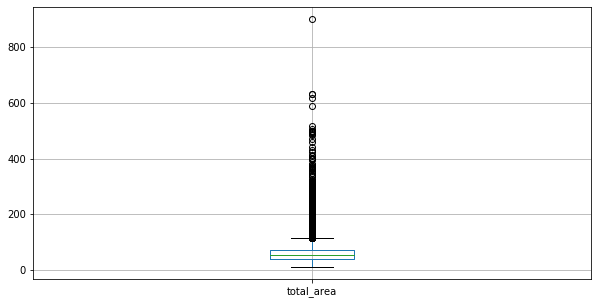

In [60]:
#построим диаграмму размаха площади квартиры
data.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.show()

In [61]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Согласно распределению, присутствует площадь свыше 100кв.м. Ее можно отсечь, так как она вызывает сильный разброс в значениях

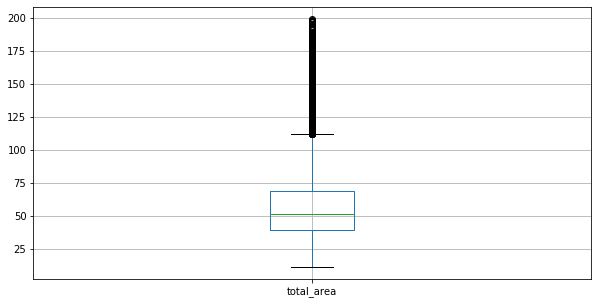

In [62]:
good_data = data.query('total_area < 200')
good_data.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.show()

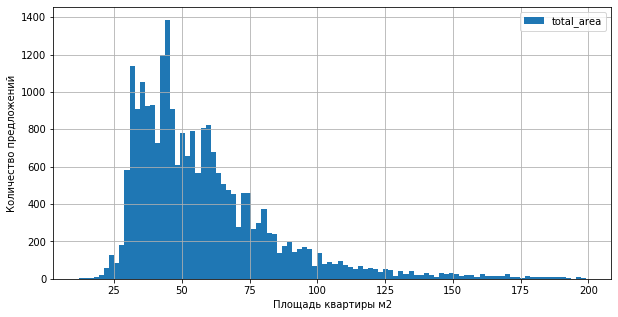

In [63]:
#построим гистрограмму
(
    good_data.sort_values(by='total_area', ascending=True)
    .plot(kind='hist', y='total_area', bins=100, figsize=(10,5), grid=True)
)
plt.xlabel('Площадь квартиры м2')
plt.ylabel('Количество предложений')
plt.show()

Более привлекательная площадь квартиры от 40 до 60 м2, больше всего предложений на квартиры около 45 м2.

***

*Цена*

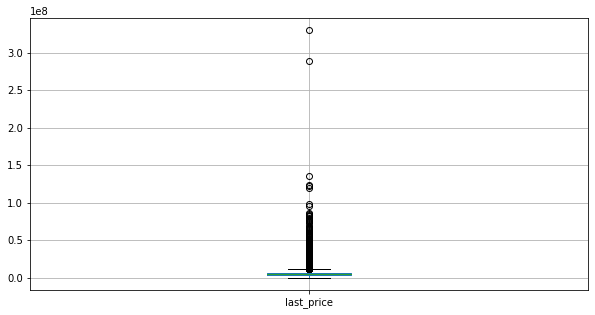

In [64]:
#построим диаграмму размаха ценовых предложений
good_data.boxplot(column=['last_price'], figsize=(10,5), grid=True)
plt.show()

Так же присутствуют выбросы, которые нам не пригодятся при исследовании. А значит отметаем квартиры стоимостью выше 10 млн. рублей.

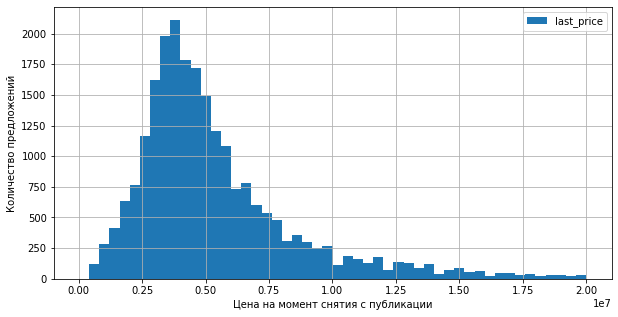

In [65]:
good_data = good_data.query('last_price < 20000000')
#сразу строим гистограмму
(
    good_data.sort_values(by='last_price', ascending=True)
    .plot(kind='hist', y='last_price', bins=50, figsize=(10,5), grid=True)
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Количество предложений')
plt.show()

Ценовой сегмент от 3х до 4х млн. руб.

***

*Число комнат*

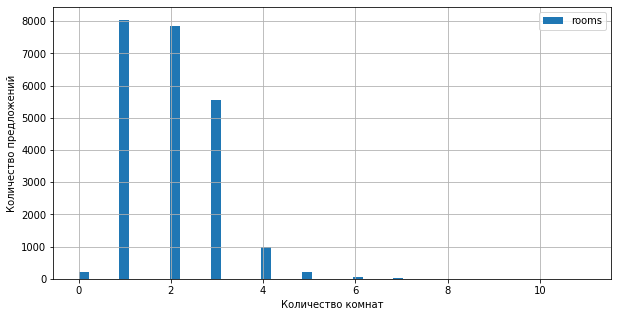

In [66]:
good_data.plot(kind='hist', y='rooms', bins=50, figsize=(10,5), grid=True)

plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()


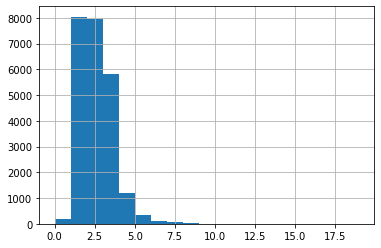

In [67]:
data['rooms'].hist(bins = data['rooms'].max())

Как и было замечено ранее 1-2 комнатные преобладают

***

*Высота потолков*

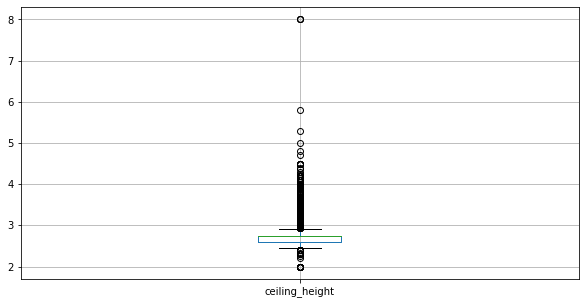

In [68]:
#построим диаграмму размаха высоты потолков
good_data.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.show()

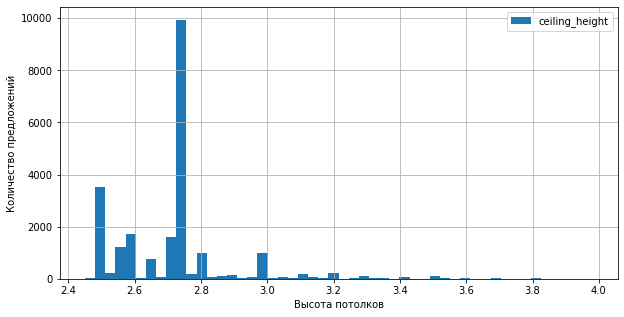

In [69]:
#Отбросим квартиры с потолками ниже 2,4 и выше 4 м
good_data = good_data.query('ceiling_height > 2.4 and ceiling_height < 4')

good_data.plot(kind='hist', y='ceiling_height', bins=50, figsize=(10,5), grid=True)
plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')
plt.show()

*Вывод*

Подавляющее большинство объявлений о продаже квартир составляют 1-2 комнатные, площадью от 40 до 60 квадратных метров, с потолками в 2,75 метра, которые стоят около 4 млн рублей.

***

**Изучим время продажи квартиры**

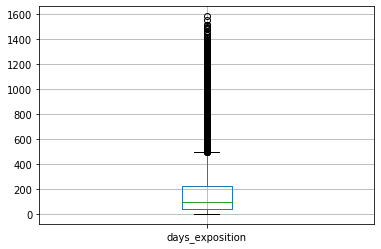

In [70]:
#построим диаграмму размаха времени продажи квартиры
good_data.boxplot('days_exposition')
plt.show()

Отметаем квартиры в значении кол-ва дней свыше 300, так как это скорее какие-то особенные квартиры, которые могут продаваться долго.

In [71]:
good_data = good_data.query('days_exposition < 550') #берем значение дней не более 1,5 лет, это примерно 550 дней

good_data['days_exposition'].agg(['mean','median'])

mean      131.505566
median     85.000000
Name: days_exposition, dtype: float64

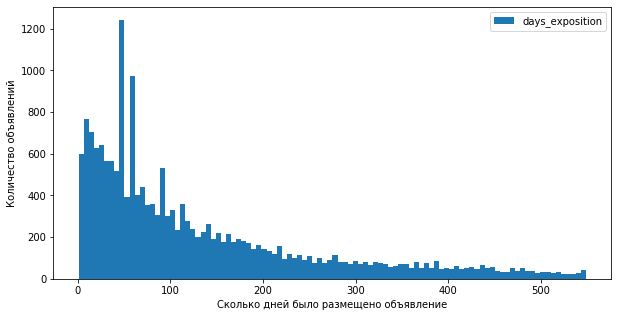

In [72]:
#строим гистограмму 
good_data.plot(kind='hist',y='days_exposition', bins=100, figsize=(10,5))

plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.show()

В среднем продажа квартиры занимаем 2-3 месяца (40-60 дней). Все зависит от факторов: местонахождение, удаленность от центра, площадь, цена. Долго квартира может продаваться из-за какой-то особенной планировки или неудобного местоположения. А быстрой продаже очень сопуствтует то, какую цену поставит хозяин.

*Значения, которые были редкими или выбивающимися из общей массы, были отброшены во избежания искажения результатов.*

***

**Какие факторы больше всего влияют на стоимость квартиры?**

*Зависимость цены от площади, числа комнат, удалённости от центра*

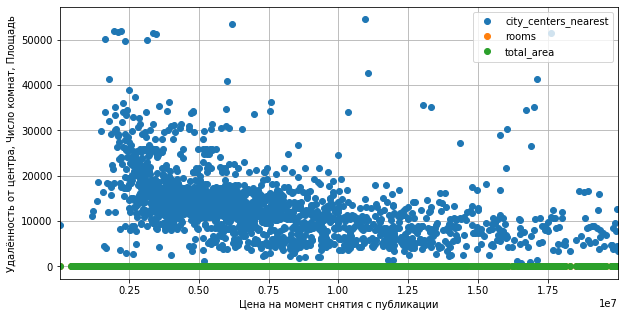

In [73]:
(
    good_data
    .pivot_table(index='last_price', values=['total_area','rooms','city_centers_nearest'])
    .plot(style='o',grid=True, figsize=(10, 5))
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Удалённость от центра, Число комнат, Площадь')
plt.show()

*Зависимость расположения квартиры по этажам*

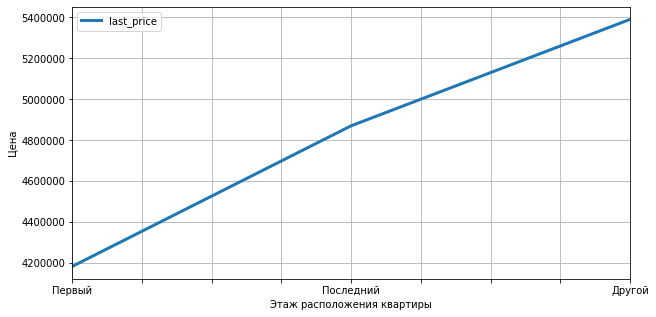

In [74]:
(
    good_data
    .pivot_table(index='floor_group', values='last_price').sort_values(by='last_price', ascending=True)
    .plot(grid=True, figsize=(10, 5),linewidth=3)
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

Не стоит забывать, что расположение квартиры на этаже "Другой" приоритетное в наших данных

*Зависимость цены от даты размещения*

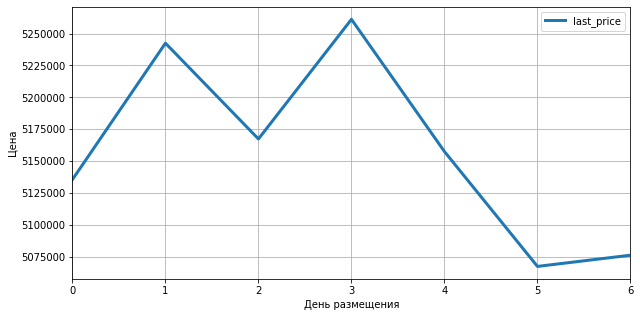

In [75]:
#строим график зависимости размещения от дня недели
(
    good_data
    .pivot_table(index='day_week_exposition', values='last_price')
    .plot(grid=True, figsize=(10, 5),linewidth=3)
)
plt.xlabel('День размещения')
plt.ylabel('Цена')
plt.show()

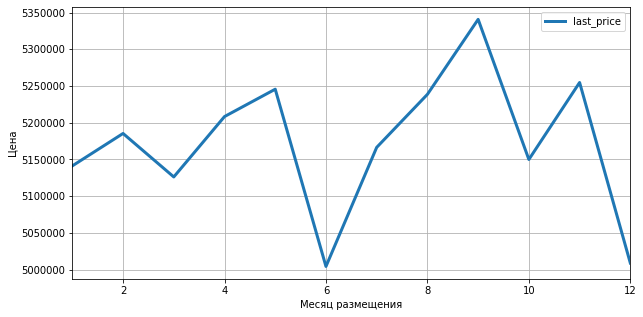

In [76]:
#строим график зависимости размещения от месяца
(
    good_data
    .pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, figsize=(10, 5),linewidth=3)
)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена')
plt.show()

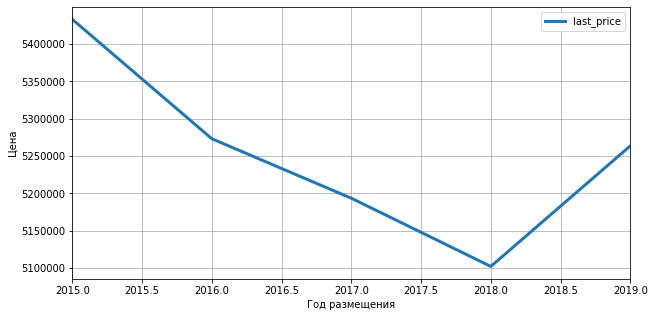

In [77]:
#строим график зависимости размещения от года
(
    good_data
    .pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, figsize=(10, 5),linewidth=3)
)
plt.xlabel('Год размещения')
plt.ylabel('Цена')
plt.show()

Можно сделать следующие выводы, исходя из графиков:

1) Чем больше и ближе квартира к центру, тем выше ее цена;

2) По графику зависимости цены от кол-ва комнат все неоднознанчно, поэтому можно сказать что этот показатель не влияет особо;

3) Любой другой этаж в приоритете, чем квартиры на первом и последнем этажах, как по количеству предложений на рынке, так и по цене;

4) Объявления размещенные до четверга имеют больше цену, чем в другие дни, особенно пт-вскр;

5) Середина и конец года - провалы на графике завсисимости от месяца размещения, соответственно продажи в этот период будут ниже, однако пик продаж приходится на объявления августа;

6) в 2015-2017 годах падение цены при размещении, но в 2018 году резкий взлет стоимости жилья.

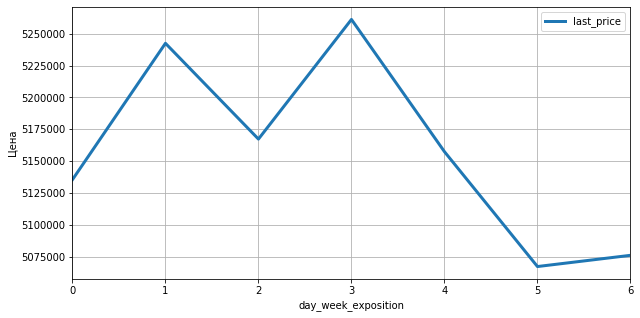

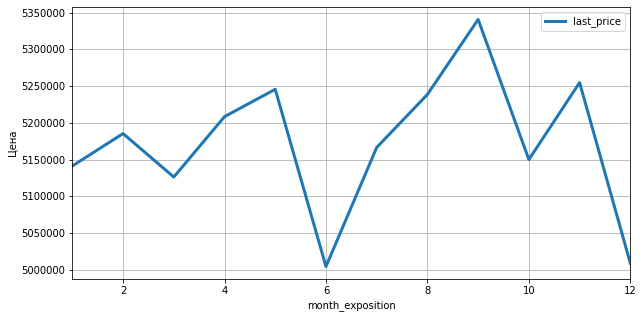

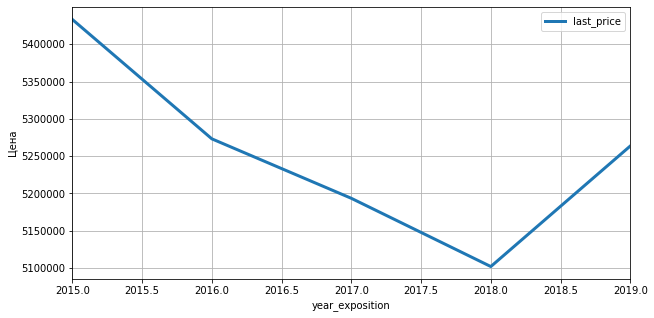

In [91]:
for i in ['day_week_exposition', 'month_exposition', 'year_exposition']:
    good_data.pivot_table(index=i, values='last_price').plot(grid=True, figsize=(10, 5),linewidth=3)
    plt.ylabel('Цена')
    plt.show()

***

**Выберем 10 населённых пунктов с наибольшим числом объявлений**

In [79]:
top_10_data = (
    data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count')
    .sort_values(by='first_day_exposition', ascending=False).head(10)
)
top_10_data.columns=['adress_sum']
top_10_data

,adress_sum
locality_name,
санкт-петербург,15721
посёлок мурино,556
посёлок шушары,440
всеволожск,398
пушкин,369
колпино,338
посёлок парголово,327
гатчина,307
деревня кудрово,299


In [80]:
#средняя цена за м2
#создадим столбец cost_mean
top_10_data['cost_mean'] = data.pivot_table(index='locality_name', values='sq_m_price', aggfunc='mean')
top_10_data_1 = top_10_data.style.format({'cost_mean':'{:.2f} руб.'})
top_10_data_1

,adress_sum,cost_mean
locality_name,,
санкт-петербург,15721,114848.57 руб.
посёлок мурино,556,85681.31 руб.
посёлок шушары,440,78676.90 руб.
всеволожск,398,68654.01 руб.
пушкин,369,103125.37 руб.
колпино,338,75424.15 руб.
посёлок парголово,327,90175.49 руб.
гатчина,307,68745.69 руб.
деревня кудрово,299,92473.09 руб.


In [81]:
#выделим пункты с самой высокой и самой низкой стоимостью жилья
(
    top_10_data_1
    .highlight_max(color='pink', subset='cost_mean')
    .highlight_min(color='lightgreen', subset='cost_mean')
)

,adress_sum,cost_mean
locality_name,,
санкт-петербург,15721,114848.57 руб.
посёлок мурино,556,85681.31 руб.
посёлок шушары,440,78676.90 руб.
всеволожск,398,68654.01 руб.
пушкин,369,103125.37 руб.
колпино,338,75424.15 руб.
посёлок парголово,327,90175.49 руб.
гатчина,307,68745.69 руб.
деревня кудрово,299,92473.09 руб.


Вывод следующий:

1) Лидером среди пунктов является Санкт-Петербург, затем идет Посёлок Мурино, далее примерно равномерное распределение количества объявлений среди области гоорода;

2) Низкое кол-во объявлений не особо влияет на среднюю цену м2, так например Пушкин и Парголово имеют ту же цену, что и Санкт-Петербург;

3) Самая низкая стоимость жилья в Выборге, самая высокая в Санкт-Петербурге.

***

**Изучаем предложения квартир**

In [82]:
#Выделим квартиры в Санкт-Петербурге ('locality_name')
#Зададим переменную spb_locality

spb_locality = data.loc[data['locality_name'] == 'санкт-петербург']
spb_locality['city_centers_nearest'].isna().sum()

61

In [83]:
spb_locality = spb_locality.dropna(subset=['city_centers_nearest'])

#Создадим столбец с расстоянием до центра в километрах и округлим до целых значений
spb_locality['city_centers_nearest_km']=(spb_locality['city_centers_nearest']/1000).round().astype(int)
spb_locality['city_centers_nearest_km'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

In [84]:
#Посчитаем среднюю цену для каждого километра
mean_km = spb_locality['last_price'].sum()/spb_locality['city_centers_nearest_km'].sum()
print('Средняя цена для каждого километра составляет {:.0f} руб.'.format(mean_km))

Средняя цена для каждого километра составляет 692718 руб.


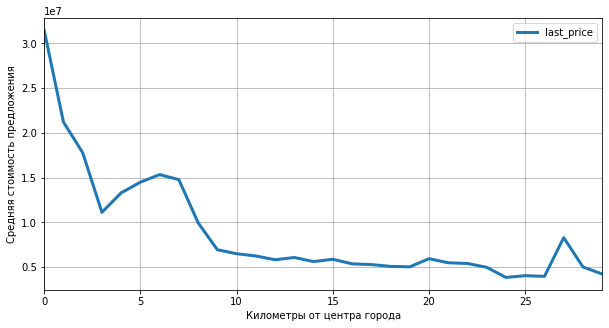

In [85]:
#Построим график: он будет показывать, как цена зависит от удалённости от центра
#определим границу центральной зоны
(
    spb_locality.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
    .plot(figsize=(10,5), grid=True, linewidth=3)
)
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

Резкое падение цен при удалении от центра отмечается при приближении к отметке в 10км, далее график более менее выравнивается (в конце небольшой скачок значений, это уже скорее всего Пушкин, либо Парголово, которые как мы выяснили из предыдущего пункта не сильно уступают стоимости квартир непоспредственно в Санкт-Петербурге). Центральной зоной можно счиать все квартиры по удаленности до 10 км от центра.

***

**Проанализируем сегмент квартир в центре**

In [86]:
spb_locality_centre = spb_locality.loc[spb_locality['city_centers_nearest_km']<10]

#изучим эту территорию и следующие парметры: площадь, цена, число комнат, высота потолков
check_1 = spb_locality_centre[['locality_name','total_area','last_price','rooms','ceiling_height']].reset_index(drop=True)
check_1.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.643813,0.750790,0.316052
last_price,0.643813,1.000000,0.351014,0.182072
rooms,0.750790,0.351014,1.000000,0.273812
ceiling_height,0.316052,0.182072,0.273812,1.000000


In [87]:
check_1.describe()

,total_area,last_price,rooms,ceiling_height
count,4715.000000,4.715000e+03,4715.000000,4715.000000
mean,86.437506,1.327110e+07,2.671050,2.921120
std,56.839196,2.224446e+07,1.393877,0.333107
min,12.000000,1.219000e+04,0.000000,2.000000
25%,51.000000,5.954074e+06,2.000000,2.730000
50%,72.600000,8.500000e+06,3.000000,2.750000
75%,102.000000,1.307500e+07,3.000000,3.070000
max,900.000000,7.630000e+08,19.000000,6.000000


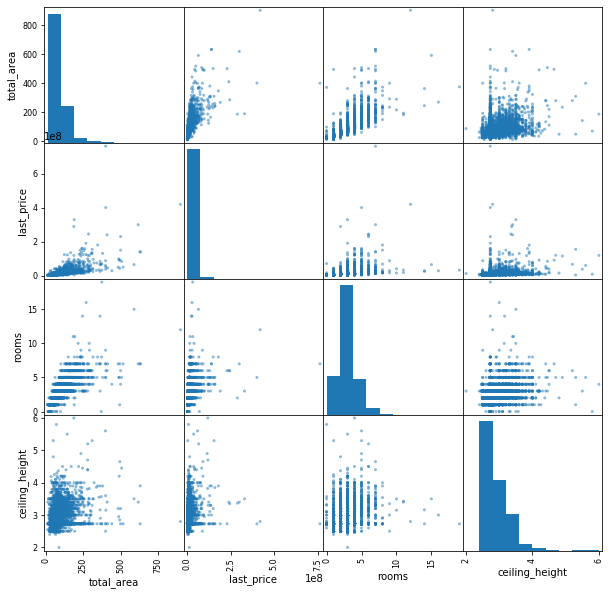

In [88]:
pd.plotting.scatter_matrix(check_1, figsize=(10, 10)) 

plt.show()

Основной сегмент в центре города занимают 2-3 комнатные квартиры, площадью до 75 м2,  с потолками 2,75 и средней ценой до 8,5 млн рублей.

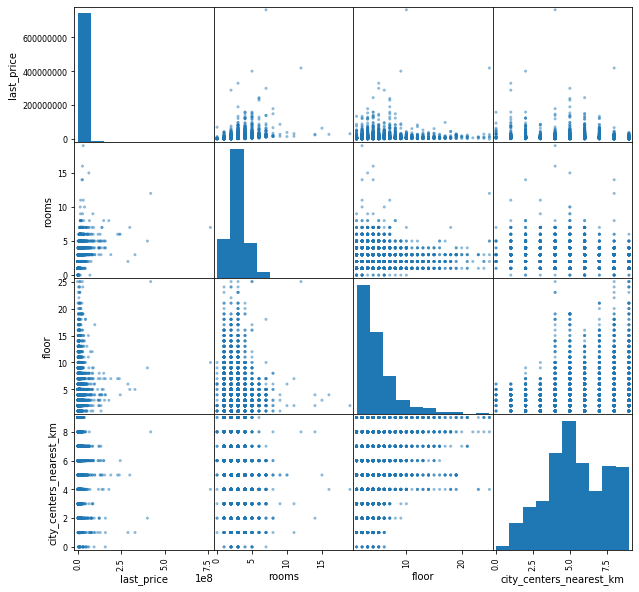

In [89]:
#выделим факторы, которые влияют на стоимость квартиры 
#(число комнат, этаж, удалённость от центра, дата размещения объявления)
check_2 = spb_locality_centre[['last_price','rooms','floor','city_centers_nearest_km','first_day_exposition']]
pd.plotting.scatter_matrix(check_2, figsize=(10, 10))
plt.show()

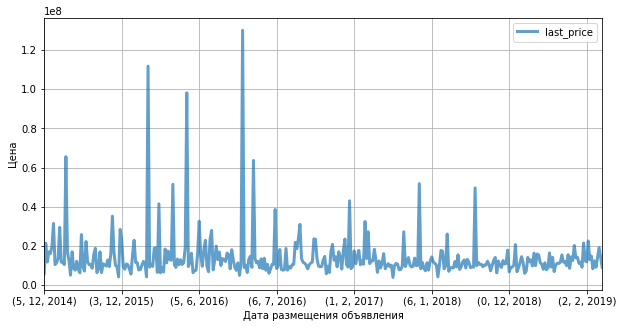

In [90]:
#Определим зависимость цены от даты размещения объявления при помощи графика
(
    spb_locality_centre
    .pivot_table(index=['day_week_exposition','month_exposition','year_exposition'], values='last_price', aggfunc='mean')
    .sort_values(by='year_exposition')
    .plot(grid=True, linewidth=3, alpha=0.7, label='2015',figsize=(10,5))
)
plt.xlabel('Дата размещения объявления')
plt.ylabel('Цена')
plt.show()

*Графики показывают, что:*

1) Цена квартир в центре города зависит не от удаленности от центра, а от площади и количества комнат, так же ценятся квартиры в центре не выше 10 этажа. 

2) Чем дальше от центра города, тем выше этаж в объявлении.

3) В датах размещения основной пик стоимости жилья замечен в 2015-16 годах и с плавным снижением в 2019, в то время как по остальным размещениям стоимость за пределами центра активно растет начиная с 2017 года.

## Общий вывод

При подготовке данных к анализу мы столкнулись с большим количеством пропусков в колонках, которые могут влиять как на среднюю цену предложения квартир на рынке, так и на анализ выделенных групп в частности. Некоторые данные удалость заполнить средним значением, чтобы основной массив данных не был потерян, а некоторые данные пришлость оставить без изменений с пропущенными значениями. По результату проделанной работы по обработке и анализу недостающих и некорректных данных, необходимо обратить внимание коллег, отвечающих за подготовку и сбор данных, на корректность заполняемости ячеек, либо на выгрузку данных из программы. Ошибки, связанные с человеческим фактором, присутствуют, но их значительно меньше.

После избавления выбивающихся значений мы выполнили такие операции как подсчёт средней стоимости квадратного метра жилья, стоимость каждого километра удаления от центра, выделили сегмент квартир расположенных в центре и проанализировали их параметры, а так же вывели статистику по скорости продажи объявления с даты его размещения, факторы влияющие на это и проанализировали статистику продаж в зависимости от периода размещения объявления.

Для большей наглядности при анализе использовались графики, на основании которых можно сделать вывод о том, что лидером по размещению объявлений о продаже недвижимости является "Санкт-Петербург", несмотря на это средняя цена квадратного метра приблизительно такая же как и по области. Тенденция рынка такова, что начиная с 2017 года активно растёт спрос на жильё за пределами центра города, при этом люди в основной своей массе стараются найти предложения квартир на любом этаже за исключением первого и последнего, за частую это высотные здания и новостройки. В центре же города ситуция обратная, застройки практически никакой не ведётся, этажность домов не большая и продажа квартир ведётся из старого фонда, что и отражается на снижающемся спросе начиная с 2016 года.

В большинстве случаев в приоритете 1-2 комнатные квартиры в высотной новостройке по периметру города Санкт-Петребург, с средней стоимостью в 100 т.р. за кв.метр. и высотой потолков 2,5. Таким образом можно сделать вывод о том, что количество таких домов и соответственно предложений будет расти в след за ценой в отличии от цен на жильё расположенного по центру исторического района города в невысоких домах из старого фонда.